In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [4]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [38]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-10-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2020_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2020_2022.dtypes

Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

In [40]:
df_uk_2020_2022.head()

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert


In [32]:
# Convert date to datetime

df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], format='%d/%m/%Y', errors='coerce')

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-10-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2020_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2020_2022.dtypes

Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

In [36]:
df_uk_2020_2022.head()

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert


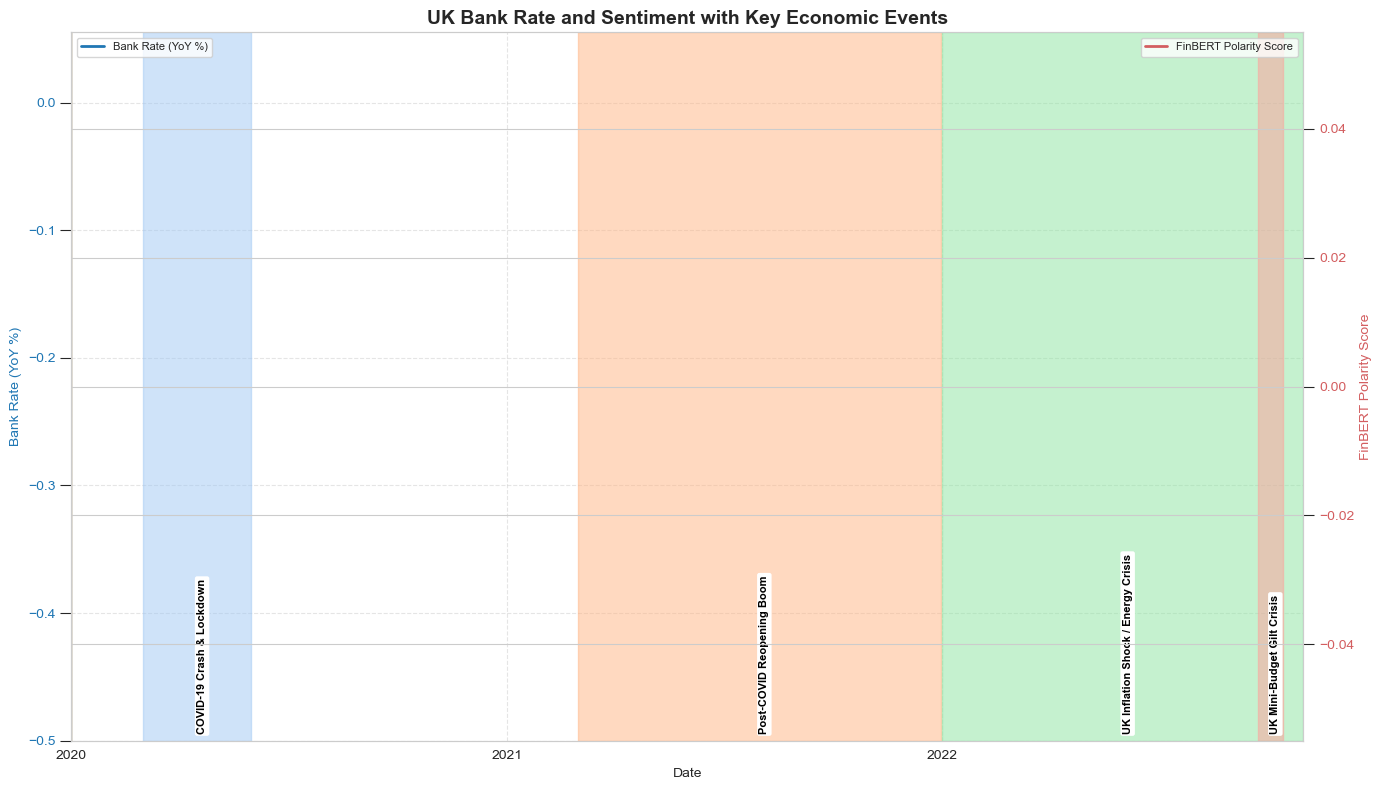

In [6]:
# Filter data from 1 Jan 2020 onwards
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-10-31')
df_plot = df_uk_2020_2022[
    (df_uk_2020_2022['Date'] >= start_date) & (df_uk_2020_2022['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_base_rate = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Bank Rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['base_rate'], color=color_base_rate, label='Bank Rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK Bank Rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that Bank Rate Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

ValueError: Axis limits cannot be NaN or Inf

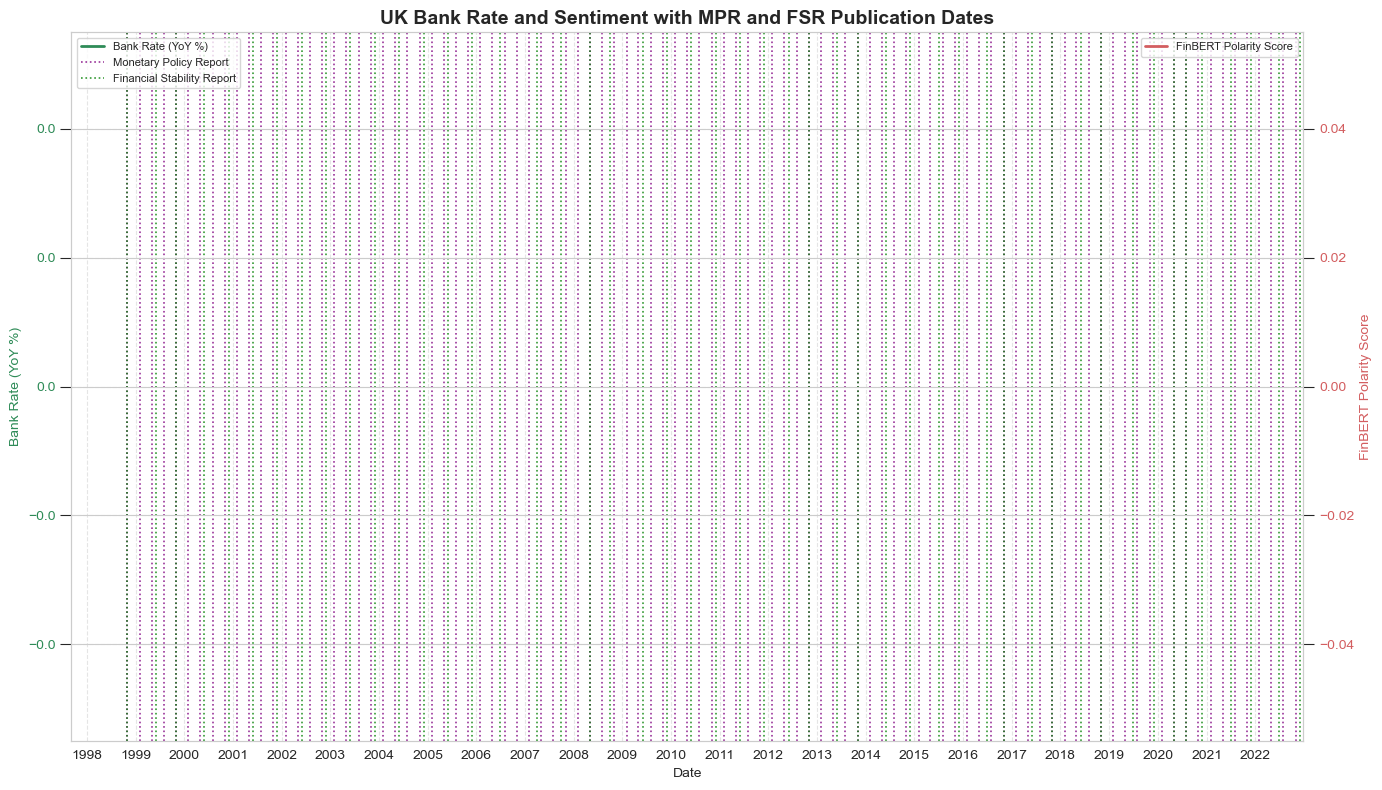

In [8]:
start_date = pd.to_datetime('2020-01-01')
df_plot2 = df_uk_2020_2022[df_uk_2020_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['base_rate', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bank Rate Line (Left Axis)
color_bank_rate = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Bank Rate (YoY %)', color=color_bank_rate, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['CPI'], color=color_bank_rate, label='Bank Rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_bank_rate, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK Bank Rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

* Rising rates reflect central bank attempts to cool inflation, especially post-2021.

* Sentiment diverges from rate trends: despite higher rates, sentiment falls sharply, suggesting market anxiety or distrust.

* Publication dates (MPR & FSR) often cluster around inflection points, reinforcing their role as catalysts or reflections of broader economic conditions.

### Drop unncessary columns to reduce the number of variables to be explored

In [ ]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2020_2022.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

### Rename columns

In [ ]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

In [ ]:
# Define the new order of the columns
new_column_order = [
    'Date', 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

# Correlation analysis

### Create pairplot for visual correlation analysis

In [ ]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

In [ ]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(January 2020 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

### Top features to keep in short-term predictive models:

- CPI_pct_change

- 0-2yr_gilts_TRReturns

- confidence_score

### Consider dropping:

- GDP_pct_change
- ftse_250_total_return (unless you're modeling longer-term trends)

In [ ]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate at t=x, Other Variables at t=x-1)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Key Correlations with BoE_base_rate (t=x):

- 0-2yr_gilts_TRReturns	-0.93	Very strong negative correlation – indicates market expectations are highly predictive of BoE rate moves.
- CPI_pct_change	0.88	Very strong positive correlation – shows inflation drives rate hikes.
- confidence_score	-0.68	Strong negative – possibly reflecting sentiment drop amid monetary tightening.
- unemployment_rate	-0.61	Strong negative – suggests BoE tightens policy when unemployment is low.
- wage_growth_rate	0.35	Weak/moderate positive – still a useful signal, but less direct.
- finbert_sentiment_score	-0.45	Moderate negative – media tone reflects economic pressure.
- ftse_250_total_return	-0.03	No meaningful relationship.
- GDP_pct_change	-0.04	Virtually no contemporaneous signal.

### Summary:
### The top two indicators are:
- 0-2yr_gilts_TRReturns (t=x-1)
- CPI_pct_change (t=x-1)

These are highly predictive of interest rate changes and align with expectations from both economics and machine learning models (as you observed in your XGBoost feature importance).
confidence_score and unemployment_rate also provide strong complementary signals.

### Suggested Features for Modeling:

For your regression or ML models, consider prioritizing:

- 0-2yr_gilts_TRReturns (t=x-1) ✅

- CPI_pct_change (t=x-1) ✅

- confidence_score (t=x-1) ✅

- unemployment_rate (t=x-1) ✅

### Optional additions if not collinear:

- wage_growth_rate (t=x-1)

- finbert_sentiment_score (t=x-1)

In [ ]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-2)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Top correlations with BoE_base_rate (t=x):

- ### CPI_pct_change	+0.90	Strongest positive correlation → inflation two periods earlier is a key driver of BoE rate increases.
- ### 0-2yr_gilts_TRReturns	-0.90	Strong negative correlation → bond yields remain the best signal for rate expectations.
- ### unemployment_rate	-0.65	Strong negative relationship → low unemployment predicts higher rates.
- ### confidence_score	-0.61	Strong inverse → economic pessimism leads to lower rate expectations.
- ### wage_growth_rate	+0.36	Moderate positive correlation.
- ### ftse_250_total_return	+0.11	Weak relationship.
- ### GDP_pct_change	-0.04	Negligible.

### Recommended Features for Regression (from t=x−2 lag):
These are both predictively strong and relatively non-redundant:

### Primary picks:

- CPI_pct_change (t=x-2)

- 0-2yr_gilts_TRReturns (t=x-2)

- unemployment_rate (t=x-2)

- confidence_score (t=x-2)

### Optional (check for multicollinearity):
- wage_growth_rate (t=x-2) – correlated with CPI (0.52), but still acceptable if VIF < 5.

### ❗️Avoid:
Using both t−1 and t−2 lags simultaneously for the same variable unless justified by the model performance and VIF checks.

Features with low correlation to target (e.g. GDP, FTSE) unless you have economic rationale.

In [ ]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-3)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### Key Insights:
### Best Predictors from t=x−3:
Prioritize predictive strength and check for low multicollinearity later:

### Strong predictors:
- CPI_pct_change (t=x-3)

- 0-2yr_gilts_TRReturns (t=x-3)

- unemployment_rate (t=x-3)

### Secondary predictors (add if justified):
- wage_growth_rate (t=x-3)

- confidence_score (t=x-3)

### ❌ Low-value features (can be dropped):
- GDP_pct_change (t=x-3)

- finbert_sentiment_score (t=x-3)

- ftse_250_total_return (t=x-3) – despite moderate correlation, it's often market-driven noise.

### Interpretation:
Economic indicators like CPI and gilt returns continue to be excellent predictors of BoE interest rate decisions even with a 3-period lag, reflecting policy reaction time. However, multicollinearity is likely between:

- CPI_pct_change and wage_growth_rate

- CPI_pct_change and 0-2yr_gilts_TRReturns



# Multiple linear regression: Bank Rate vs CPI_pct_change (t=x-3), 0-2yr_gilts_TRReturns (t=x-3), unemployment_rate (t=x-3),wage_growth_rate (t=x-3), confidence_score (t=x-3)

### Prepare regression dataframe

In [ ]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['CPI_pct_change (t=x-3)'] = filtered_df['CPI_pct_change'].shift(3)
regression_df['2-yr_gilts_TRReturns (t=x-3)'] = filtered_df['0-2yr_gilts_TReturns']
regression_df['unemployment_rate (t=x-3)'] = filtered_df['unemployment_rate']
regression_df['wage_growth_rate (t=x-3)'] = filtered_df['wage_growth_rate']
regression_df['confidence_score (t=x-3)'] = filtered_df['confidence_score']

# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

In [ ]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['CPI_pct_change (t=x-3)', '2-yr_gilts_TRReturns (t=x-3)', 'unemployment_rate (t=x-3)', 'confidence_score (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

In [ ]:
# Call the predictions for X (array).
mlr.predict(X)

In [ ]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

In [ ]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### Consistency in low and high values: Predictions closely follow the actual rate changes across the full range.Strong linear alignment suggests your model likely captures key economic dynamics.

Model Performance Looks Strong:

Most points lie close to the red diagonal line, indicating that the model's predictions are generally accurate.

### Training and testing subsets with MLR

In [ ]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

### <span style="color: orange;"> R-squared = 0.912: Indicates that 91.2% of the variation in the BoE base rate is explained by your model.

### <span style="color: orange;"> Adj. R-squared = 0.895:bAdjusted for number of predictors; still very high, meaning minimal overfitting.

### <span style="color: orange;"> F-statistic = 52.03 with a p-value of 2.72e-10:Model is statistically significant overall.

### <span style="color: orange;">Durbin-Watson = 2.201
### <span style="color: orange;">Close to 2 ⇒ No autocorrelation in residuals.

### <span style="color: orange;">Jarque-Bera p = 0.523
### <span style="color: orange;">Residuals are likely normally distributed.

### <span style="color: orange;">Condition No. = 1.32e+05 ⚠️
### <span style="color: orange;">Very high ⇒ Potential multicollinearity concerns.

- ### CPI_pct_change (t=x-3) | 0.2133 | 0.000 ✅ | Statistically significant; base rate rises ~0.21 for every 1 unit rise in CPI three periods prior. |
- ### 2-yr_gilts_TRReturns (t=x-3) | -0.1343 | 0.341 ❌ | Not statistically significant (p > 0.05). |
- ###  unemployment_rate (t=x-3) | 0.5261 | 0.001 ✅ | Strong and significant positive predictor. |
- ###  confidence_score (t=x-3) | -0.0063 | 0.187 ❌ | Not statistically significant. |

The model has excellent explanatory power.

### The CPI percentage change and unemployment rate at lag 3 are strong predictors.

### 2-yr gilts and confidence score may be dropped or tested for multicollinearity (which is hinted at by the high condition number).

Consider checking VIF scores or using regularization (e.g., Ridge, Lasso) if collinearity persists

In [ ]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

In [ ]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

In [ ]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

In [ ]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

### <span style="color: orange;"> R-square of 96.10% when the multiple linear regression model based on the training data set is applied to the testing data set. Great, but potential issues with multicollinearity remain

### Check for multicollinearity

In [ ]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

### <span style="color: orange;"> Observations from the VIF output:
- const	480,908.0	Ignore — VIF for the constant term is not meaningful.
- CPI_pct_change (t=x-3)	10.2	 High multicollinearity — VIF > 10
- 2-yr_gilts_TRReturns (t=x-3)	7.9	 Borderline high — possible multicollinearity
- unemployment_rate (t=x-3)	3.2	Acceptable
- confidence_score (t=x-3)	1.8	Safe

### Address Multicollinearity
### Drop one of the collinear variables:
Try removing CPI_pct_change (t=x-3) or 2-yr_gilts_TRReturns (t=x-3) and re-run the model.Check if the condition number drops and VIFs normalize.

### Check for heteroscedasticity

In [ ]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [ ]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

### LM stat	11.996	High value indicates a potential issue with omitted variables.
### LM Test p-value	0.0174	 Significant (p < 0.05) — suggests autocorrelation or specification error.
### F-stat	4.612	Indicates overall significance of the regression model.
### F-test p-value	0.0084	 Significant (p < 0.05) — the model is statistically significant overall.

### Check normality of regression residuals - assumption of MLR

In [ ]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### The points generally lie along the red 45° reference line, which indicates that:

The residuals are approximately normally distributed.

This supports the assumption of normality of errors, which is important for:

Valid hypothesis testing (e.g., p-values, confidence intervals)

OLS model assumptions

### Deviations at the tails (some divergence at the top-right):

Slight upward curve suggests mild right skew or heavier tails than normal.

However, these deviations do not appear severe.


## Evaluate the model

In [ ]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

### <span style="color: orange;">  On average, the model's predictions for CPI percentage change deviate from the actual values by about 0.1395 percent (MAE). On the other hand, the average of the squared prediction errors is approximately 0.0243 percent (MSE).

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

Non-linearity:

The curved pattern suggests the relationship between predictors and the target variable might not be perfectly linear.

You may be missing a nonlinear term or interaction in your model.

Possible Heteroskedasticity:

The spread of residuals changes as fitted values increase, which violates the constant variance assumption.

This can affect the efficiency of your estimates and the validity of hypothesis tests.

Potential Outlier/Influential Point:

The large residual in the top-right corner could skew your regression results or affect model stability.



## Multiple linear regression: Drop all independent variables except for CPI_pct_change (t=x-3), unemployment_rate (t=x-3)  as a variable and explore transformation of dependent variable (if possible)

# Re-perform MLR with only the lagged BoE_base_rate Percentage Change as an independent variable. Transformation of dependent variable not straight forward as it contains negative numbers

In [ ]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['CPI_pct_change (t=x-3)','unemployment_rate (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

In [ ]:
# Call the predictions for X (array).
mlr.predict(X)

In [ ]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

In [ ]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

Points are closely clustered around the 45-degree red line:

### This indicates that your model predictions align well with the actual values, especially at lower and mid-range rates.

Slight underestimation at higher actual values:

For values above ~2.0%, predictions tend to fall below the red line, suggesting the model slightly underpredicts at higher values.

This may hint at some non-linearity or saturation not fully captured by the model.

### Good overall fit:

Strong alignment with the line suggests the model generalizes well.

### Training and testing subsets with MLR

In [ ]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

### Similar R-squared and adj. R-square at similar levels as before, which is great, however there is still signs of potential multicollinearity

In [ ]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

### No multicollinearity concerns with the predictors.VIFs < 5 are usually considered safe.

In [ ]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [ ]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

### H₀: Homoskedasticity (equal variance of residuals)

### Since both p-values < 0.05, we reject the null. This suggests:

### The regression model has heteroskedasticity — the residuals’ variance is not constant



In [ ]:
regression_df.describe()

In [ ]:
regression_df.info()

In [ ]:
regression_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'BoE_base_rate (t=x)',
        'CPI_pct_change (t=x-3)',
        '2-yr_gilts_TRReturns (t=x-3)',
        'unemployment_rate (t=x-3)',
        'wage_growth_rate (t=x-3)',
        'confidence_score (t=x-3)'
    ]
)

# Define features and target
X = regression_df[
    [
        'CPI_pct_change (t=x-3)',
        '2-yr_gilts_TRReturns (t=x-3)',
        'unemployment_rate (t=x-3)',
        'wage_growth_rate (t=x-3)',
        'confidence_score (t=x-3)'
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

- CPI_pct_change (t=x−3)	0.33	Most influential—suggests inflation changes have a strong lagged effect on interest rate decisions.
- Confidence_score (t=x−3)	0.28	Close second—economic sentiment influences monetary policy.
- 2-yr_gilts_TRReturns (t=x−3)	0.25	Market expectations on short-term rates are also key.
- Unemployment_rate (t=x−3)	0.13	Labor market condition has some influence.
- Wage_growth_rate (t=x−3)	0.02	Least important in this lag—minimal effect from wage growth at 3 months prior.

### The model relies most heavily on inflation and sentiment indicators when predicting base rate changes 3 months ahead.

### 2-year gilt returns likely reflect market interest rate expectations, aligning with monetary policy movements.

### Wage growth appears negligible at this lag—possibly more relevant at other time horizons or due to collinearity.

### Recommendation:
- Prioritize CPI, confidence score, and gilt returns at lag t−3.
- Consider testing these at t−2 and t−1 to evaluate if predictive power increases.

In [ ]:
regression_df.head()

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
#regression_df = regression_df.dropna(subset=[
  #  'BoE_base_rate (t=x)', 'BoE_base_rate (t=x-1)',
   # 'confidence_score (t=x)', 'wage_growth_rate (t=x-3)',
   # 'ftse_250_total_return (t=x-3)'
#])

# Features and target
X = regression_df[[ 
        'CPI_pct_change (t=x-3)',
        '2-yr_gilts_TRReturns (t=x-3)',
        'unemployment_rate (t=x-3)',
        'wage_growth_rate (t=x-3)',
        'confidence_score (t=x-3)']]

y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

- ### CPI_pct_change (t=x−3)	0.47	Most critical driver—XGBoost strongly favors inflation from 3 months ago in forecasting rate changes.
- ### 2-yr_gilts_TRReturns (t=x−3)	0.28	Market expectations on short-term bonds significantly influence BoE decisions.
- ### Confidence_score (t=x−3)	0.25	Economic sentiment remains relevant, though slightly less than yields.
- ### Unemployment_rate (t=x−3)	0.00	No importance assigned—XGBoost excludes this from splits.
- ### Wage_growth_rate (t=x−3)	0.00	Also not contributing—possibly due to redundancy or low variance at this lag.


### XGBoost focuses almost exclusively on 

- ### inflation, 
- ### gilt returns, 
- ### confidence.

Labor market indicators (unemployment and wage growth) are deemed non-informative at this lag, perhaps better used at other lags or via interaction terms.

The model is sparse and efficient, relying only on 3 key features.

### Modeling Implications:
You can simplify your regression or ML model using just the top 3 features from this output.
Consider cross-validating these findings with different lags (t−1, t−2) or using SHAP values for deeper insight into feature impact per observation.

In [ ]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

### Key Observations:
Left: Random Forest Regressor
- Accuracy: Reasonable alignment along the diagonal.

- Bias: Slight underestimation at higher actual values.

Dispersion: Some scatter—especially as predicted values rise—indicating more variance.

Right: XGBoost Regressor
- Accuracy: Stronger alignment with the diagonal line.

- Bias: Less underestimation of high values than Random Forest.

- Tight Fit: Most points lie closer to the red line, indicating better predictive power and less variance.

### Interpretation:
### Both models perform reasonably well.

### XGBoost outperforms Random Forest, especially for extreme rate changes, which is crucial when predicting sharp economic shifts.

This complements the earlier feature importance results, where XGBoost focused on fewer but highly relevant features.